In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib


from astropy.io import fits
import os
from astropy.coordinates import SkyCoord
from astropy.coordinates import FK5


from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
file = 'III_159A_catalog.dat'
names = ('Star', 'Nobs', 'Smin', 'Smax', 'Smean', 'e_Smean', 'sdS', 'Wmin', 'Wmean', 
         'Date1', 'Date2', 'SName', 'RAdeg DEdeg', 's', 'Bmag', 'Vmag', 'ASCC', 'HIP')
hk = pd.read_table(file, delimiter='|', comment='#', names=names)

radec = hk['RAdeg DEdeg'].str.split(' ', expand=True).loc[:,0:1]
radec.columns = ['RA', 'Dec']
# print(radec.values[261])


In [3]:
print(len(hk))
for x in range (0,len(hk)):
    target = hk['Star'][x]
    print(target)
#     d = SkyCoord.from_name(target)  
#     print(d)

3111
 +58 1199 
 +51 1696 
 +44 2051 
 +32 0719 
 +01 0306 
 +01 0306 
 +00 0873 
Coma   53 
Coma   58 
Coma   65 
Coma   76 
Coma   85 
Coma   86 
Coma   90 
Coma   92 
Coma   97 
Coma  102 
Coma  111 
Coma  114 
Coma  118 
Coma  132 
Coma  150 
Gl    685 
Gl    702B
Hya     1 
Hya     1 
Hya     2 
Hya     2 
Hya     3 
Hya     4 
Hya     5 
Hya     6 
Hya     7 
Hya     8 
Hya     9 
Hya    10 
Hya    10 
Hya    11 
Hya    13 
Hya    15 
Hya    15 
Hya    16 
Hya    17 
Hya    17 
Hya    18 
Hya    18 
Hya    19 
Hya    20 
Hya    21 
Hya    21 
Hya    21 
Hya    22 
Hya    22 
Hya    23 
Hya    24 
Hya    25 
Hya    26 
Hya    27 
Hya    27 
Hya    28 
Hya    29 
Hya    29 
Hya    31 
Hya    31 
Hya    32 
Hya    33 
Hya    35 
Hya    35 
Hya    36 
Hya    36 
Hya    37 
Hya    37 
Hya    38 
Hya    41 
Hya    42 
Hya    42 
Hya    43 
Hya    44 
Hya    46 
Hya    47 
Hya    48 
Hya    48 
Hya    49 
Hya    49 
Hya    50 
Hya    50 
Hya    51 
Hya    51 
Hya    52 
Hya    52 
Hya  

In [4]:
# i = 281 # the star w/ 77 visits in GALEX (HD 4174, symbiotic M giant)
i = 261 # 74 visits (HD 3765)

In [5]:
target = hk['Star'][i]
ra = float(radec['RA'][i][1:])
print(ra)
dec = float(radec['Dec'][i][1:])
print(dec)

# coordinates that I found
# ra = 10.2920
# dec = 40.2025


# found using isrc data, pretty much the same thing that Galex gives us...
# ra = 10.20528789
# dec = 40.18717517

# new coordinates with procession calculated
# ra = 10.25784158
# dec = 40.20826933


step_size = 10. # the time resolution
img_step_size = 30.
img_size = [0.1, 0.1]
phot_rad = 0.0045
# phot_rad = 0.01
ap_in = 0.0050 #changed from .005
ap_out = 0.0060 #changed from .006
# ap_in = 0.015
# ap_out = 0.02



# img_step_size = 30.
#screen saver

print(target)

10.2042
40.1888
HD   3765 


In [7]:
exp_data = gFind(band="NUV", skypos=[ra, dec], exponly=True)
k = 0;
timeArray = []
for tstart, tstop in zip(exp_data['NUV']['t0'], exp_data['NUV']['t1']):
        timeArray.append((tstart, tstop))
#         print(tstart, tstop, tstop-tstart)
        print(timeArray[k][0],timeArray[k][1],timeArray[k][1]-timeArray[k][0])
        k = k + 1
#         print(len(timeArray))
        if k == 5:
            break

NUV: 114007.0s (raw) in 74 exposures.
749646829.995 749647397.995 568.0
1
749651677.995 749653315.995 1638.0
2
750580904.995 750582295.995 1391.0
3
873882164.995 873883767.995 1603.0
4
874213366.995 874214202.995 836.0
5


In [9]:
flux = np.zeros(len(exp_data['NUV']['t0']))

aVar = True
counter = 0

currentTime = str(datetime.datetime.now())
currentTime = currentTime.split(" ")
currentTime = currentTime[1].split(":")
currentTime = str(currentTime[0])+":"+str(currentTime[1])

currentDate = str(datetime.date.today()) + "_" + str(counter)
while(aVar):
    if not os.path.exists(currentDate):
#        os.makedirs(currentDate)
#        os.makedirs(currentDate + "/ds9_Images")
#        os.makedirs(currentDate + "/data")
        os.makedirs(currentDate + "/Lightcurves")
        aVar = False
    else:
        counter = counter + 1 
        currentDate = str(datetime.date.today()) + "_" + str(counter)
        avar = True


gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size,
      csvfile=currentDate+"/Lightcurves"+target+'_Lightcurve.csv', radius=phot_rad, annulus=[ap_in,ap_out],
      trange=[749646829.995,749647397.995])

{'bg': array([ 22.2844106 ,  31.93672374,  16.00003201,  40.14024398,
         31.6937751 ,  33.20656004,  50.78997594,  28.45314224,
         31.91128117,  30.14815023,  20.63179422,  34.62481965,
         22.20592713,  36.80470619,  30.34643712,  20.97640023,
         25.51117633,  44.8600947 ,  33.04657579,  33.07962815,
         28.64006425,  31.67022334,  30.03339258,  18.93406646,
         27.13410594,  30.49013631,  28.47443228,  42.04322876,
         42.71573656,  38.31929644,  32.98305124,  30.04994422,
         35.16846305,  45.78909117,  22.35352058,  17.34920084,
         26.90618046,  28.72154795,  33.79902298,  30.62170411,
         27.14470562,  33.20803159,  36.38828829,  33.54095208,
         33.63494144,  26.84511005,  41.16572576,  30.24562356,
         33.41091928,  35.09909497,  36.6694271 ,  32.34937237,
         31.81762114,  26.96286495,  33.187353  ,  25.4966685 ,  22.48299497]),
 'bg_counts': array([ 14.,  20.,  10.,  25.,  20.,  21.,  32.,  18.,  20.,  19.,  

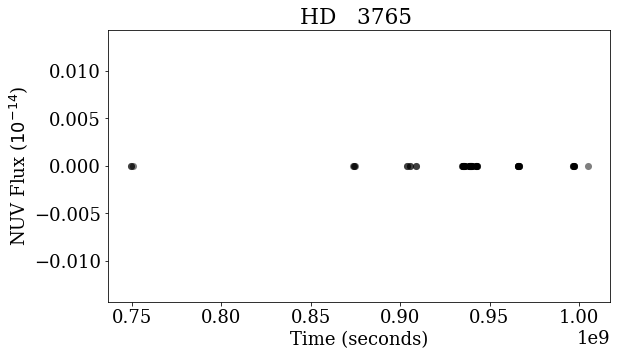

In [12]:


plt.figure(figsize=(9,5))
plt.scatter((exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]), flux/1e-14,
           s=50, alpha=0.5, lw=0, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('NUV Flux ($10^{-14}$)')
plt.annotate("RA =" + str(ra) + "\n" + "DEC = " + str(dec), xy = (0, 1), size = "small", color = 'b')
plt.title(target)

# plt.savefig(currentDate+'/'+target+'_.png', dpi=150, bbox_inches='tight', pad_inches=0.25)
# plt.savefig("Plots/"+currentDate+"_"+currentTime+"_"+target+'_.png', dpi=150, bbox_inches='tight', pad_inches=0.25)